## **Mount implementation folder in google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/FYP/Implementation/data
! ls

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/data
ann_backdoors.pkl	OTset.csv		  testset.csv
ann_dos.pkl		preprocessing.csv	  UNSW-NB15_1.csv
encoded-data.csv	preprosessing-dos.csv	  UNSW-NB15_2.csv
knn_worms.pkl		selected_columns_all.csv  UNSW-NB15_3.csv
NUSW-NB15_features.csv	SVR-predict-data.csv	  UNSW-NB15_4.csv


In [ ]:
attack_type = 'Shellcode'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **Load balanced training datset for DOS attacks**

Data = (x_train, y_train)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle

#get select columns for training
select_col=pd.read_csv("selected_columns_all.csv", sep=',', on_bad_lines='skip', index_col=False)
columns=list(select_col[attack_type])

#create training dataset down sampling
df = pd.read_csv('encoded-data.csv', sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']


DoS_attacks = df[df[attack_type] == 1]
Normal_Data = df[df['Label'] == 0]
frames = [DoS_attacks, Normal_Data]
result = pd.concat(frames)
X=result.drop(labels=attack_labels, axis=1)
Y=result[[attack_type]]
X.head()

undersample = RandomUnderSampler(random_state=0)
# fit and apply the transform
X, Y = undersample.fit_resample(X,Y)


x_train,y_train  = shuffle(X[columns],Y)


X_train_DoS_normalized = preprocessing.normalize(x_train)
X_train_DoS_normalized 




array([[0.33650649, 0.00667672, 0.33917717, ..., 0.06009044, 0.01335343,
        0.78785249],
       [0.31861692, 0.00632176, 0.32114562, ..., 0.05689588, 0.01264353,
        0.81171453],
       [0.30453578, 0.00604238, 0.30695273, ..., 0.05438139, 0.01208475,
        0.82901407],
       ...,
       [0.29318444, 0.00581715, 0.2955113 , ..., 0.05235436, 0.0116343 ,
        0.84232355],
       [0.44812341, 0.00889134, 0.45167995, ..., 0.08180031, 0.01244787,
        0.57615867],
       [0.        , 0.01841661, 0.77963644, ..., 0.        , 0.00613887,
        0.44199861]])

## **Create Test Set for DOS attacks**

Data = (x_test_DOS_normalized, y_test)

In [5]:
import pandas as pd
import numpy as np
select_col=pd.read_csv("selected_columns_all.csv", sep=r'\s*,\s*', on_bad_lines='skip', index_col=False)

columns=list(select_col[attack_type])
test_data =pd.read_csv("testset.csv", sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']
attack_categories = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] 

attacks = test_data[test_data['attack_cat'] == attack_type]
# print(DoS_attacks.shape)
Normal_Data = test_data[test_data['Label'] == 0]
# print(Normal_Data.shape)

frames = [attacks, Normal_Data]
result = pd.concat(frames)
X=result.drop(labels=['attack_cat', 'Label'], axis=1)
Y=result[['Label']]
X.head()

x_test,y_test  = shuffle(X[columns],Y)

x_test = x_test.replace('-','')
x_test = x_test.replace(r'^\s*$', np.nan, regex=True)

#delete raws with missing values
for i in x_test.columns.values.tolist():
  i = x_test.loc[x_test[i].isnull()].index
  x_test = x_test.drop(index=list(i))
  y_test = y_test.drop(index=list(i))

percent_missing = x_test.isnull().sum()
missing_value_df = pd.DataFrame({'column_name': x_test.columns, 'count_missing': percent_missing, 'To be dropped': (percent_missing > 45)})
print(missing_value_df)

x_test.head()
#encode the data
from sklearn.preprocessing import LabelEncoder

# replace hex with int
if 'sport' in x_test:
    x_test['sport'] = x_test['sport'].astype(str).apply(int, base=16)
if 'dsport' in x_test:
    x_test['dsport'] = x_test['dsport'].astype(str).apply(int, base=16)

# #Create an instance of Label-encoder
labelencoder = LabelEncoder() 

# # encode columns consists with strings
if 'srcip' in x_test:
    x_test['srcip'] = labelencoder.fit_transform(x_test['srcip'])
if 'dstip' in x_test:
    x_test['dstip'] = labelencoder.fit_transform(x_test['dstip'])
if 'proto' in x_test:
    x_test['proto'] = labelencoder.fit_transform(x_test['proto'])
if 'state' in x_test:
    x_test['state'] = labelencoder.fit_transform(x_test['state'])

X_test_DoS_normalized = preprocessing.normalize(x_test) 


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


                       column_name  count_missing  To be dropped
dttl                          dttl              0          False
state                        state              0          False
sttl                          sttl              0          False
swin                          swin              0          False
proto                        proto              0          False
ct_dst_sport_ltm  ct_dst_sport_ltm              0          False
srcip                        srcip              0          False
dstip                        dstip              0          False
ct_dst_ltm              ct_dst_ltm              0          False
ct_src_ ltm            ct_src_ ltm              0          False
smeansz                    smeansz              0          False
ct_srv_src              ct_srv_src              0          False
dmeansz                    dmeansz              0          False
Spkts                        Spkts              0          False
sbytes                   

**Normalization**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd

# df=pd.read_csv('filtered-data.csv')
# X=df.drop(labels=['Label'], axis=1)
# # X=df.drop(labels=['attack_cat','Label'], axis=1)
# # Y=df[['attack_cat','Label']]
# Y=df[['Label']]

# # split the dataset
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train_DoS_normalized = preprocessing.normalize(x_train)
X_train_DoS_normalized 
# X_train_normalized = preprocessing.normalize(X_train)
# X_test_normalized = preprocessing.normalize(X_test)

array([[0.33650649, 0.00667672, 0.33917717, ..., 0.06009044, 0.01335343,
        0.78785249],
       [0.31861692, 0.00632176, 0.32114562, ..., 0.05689588, 0.01264353,
        0.81171453],
       [0.30453578, 0.00604238, 0.30695273, ..., 0.05438139, 0.01208475,
        0.82901407],
       ...,
       [0.29318444, 0.00581715, 0.2955113 , ..., 0.05235436, 0.0116343 ,
        0.84232355],
       [0.44812341, 0.00889134, 0.45167995, ..., 0.08180031, 0.01244787,
        0.57615867],
       [0.        , 0.01841661, 0.77963644, ..., 0.        , 0.00613887,
        0.44199861]])

## **Model Training**

In [7]:
# no of features
n_features = np.shape(X_train_DoS_normalized)[1]
n_features

15

In [8]:
from sklearn.neural_network import MLPClassifier

x = np.array(X_train_DoS_normalized)
y = np.array(y_train,).ravel()

#Initializing the MLPClassifier
MLPClassifier = MLPClassifier(hidden_layer_sizes=(30, 15, 7, 5, 2), max_iter=300,activation = 'relu',solver='adam',random_state=1, verbose = 0)

#Fitting the training data to the network
clf = MLPClassifier.fit(x, y)

In [9]:
# save trained model
from joblib import Parallel, delayed
import joblib
  
# Save the model as a pickle in a file
joblib.dump(clf, 'ann_shellcode.pkl')

['ann_shellcode.pkl']

Accuracy score for train set: 0.9967914438502674


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


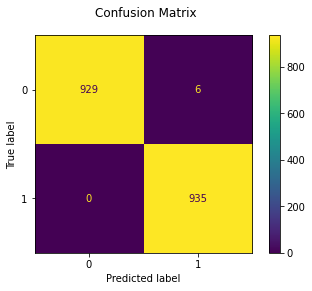

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

print(f"Accuracy score for train set: {clf.score(x, y)}")
fig=plot_confusion_matrix(clf, x, y)
fig.figure_.suptitle("Confusion Matrix")
plt.show()

Accuracy score: 0.9700988894645552


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


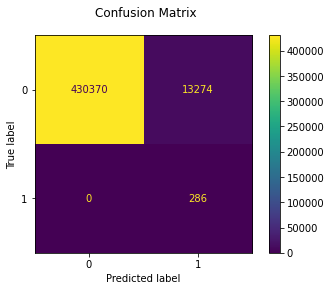

In [ ]:
x_test_array = np.array(X_test_DoS_normalized)
y_test_array = np.array(y_test)

print(f"Accuracy score: {clf.score(x_test_array, y_test_array)}")
fig=plot_confusion_matrix(clf, x_test_array, y_test_array)
fig.figure_.suptitle("Confusion Matrix")
plt.show()

## **Model Testing**

maximum_test_accuracy:  0.990174, optimal_threshold:  0.990000


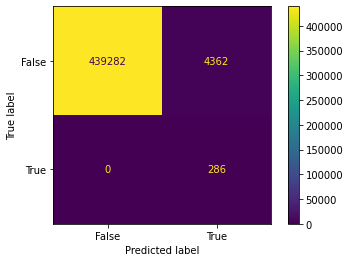

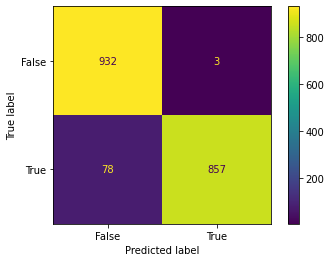

maximum_train_accuracy:  0.956684, optimal_threshold:  0.990000


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

#getting probabilities of class 1
x_test_array = np.array(X_test_DoS_normalized)
y_test_array = np.array(y_test)
prob_test_all=clf.predict_proba(x_test_array)
prob_test = prob_test_all[:, 1]

x_train_array = np.array(X_train_DoS_normalized)
y_train_array = np.array(y_train)
prob_train_all=clf.predict_proba(x_train_array)
prob_train = prob_train_all[:, 1]

optimal_threshold = 0
maximum_accuracy = 0

for i in range(1,100):
  threshold = i/100
  y_predict_class_test = [1 if p > threshold else 0 for p in prob_test]
  accuracy = accuracy_score(y_test_array, y_predict_class_test)
  # print(f"accuracy: {accuracy: .6f}, threshold: {threshold: .6f}")
  if maximum_accuracy < accuracy:
    maximum_accuracy = accuracy
    optimal_threshold = threshold
    opt_y_test = y_predict_class_test 
print(f"maximum_test_accuracy: {maximum_accuracy: .6f}, optimal_threshold: {optimal_threshold: .6f}")
confusion_matrix = metrics.confusion_matrix(y_test_array, y_predict_class_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show() 

y_predict_class_train = [1 if p > optimal_threshold else 0 for p in prob_train]
accuracy = accuracy_score(y_train_array, y_predict_class_train)
confusion_matrix = metrics.confusion_matrix(y_train_array, y_predict_class_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show() 

print(f"maximum_train_accuracy: {accuracy: .6f}, optimal_threshold: {optimal_threshold: .6f}")

## **Model Testing: F1 Score**

maximum_test_f1_score: 0.12377850162866448, accuracy: 0.9909107291690131, optimal_threshold:  0.990000


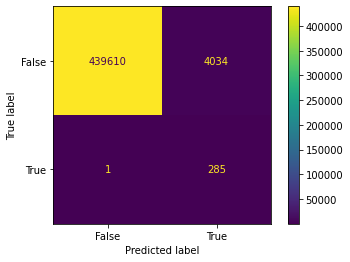

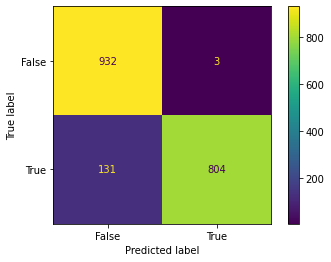

maximum_train_f1_score: 0.923076923076923, accuracy: 0.9283422459893048, optimal_threshold:  0.990000


In [10]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import joblib
  
# Load the model from the file
ann_clf = joblib.load('ann_shellcode.pkl')

#getting probabilities of class 1
x_test_array = np.array(X_test_DoS_normalized)
y_test_array = np.array(y_test)
prob_test_all=ann_clf.predict_proba(x_test_array)
prob_test = prob_test_all[:, 1]

x_train_array = np.array(X_train_DoS_normalized)
y_train_array = np.array(y_train)
prob_train_all=ann_clf.predict_proba(x_train_array)
prob_train = prob_train_all[:, 1]

optimal_threshold = 0
maximum_f1 = 0

for i in range(1,100):
  threshold = i/100
  y_predict_class_test = [1 if p > threshold else 0 for p in prob_test]
  f1 = f1_score(y_test_array, y_predict_class_test)
  if maximum_f1 < f1:
    maximum_f1 = f1
    optimal_threshold = threshold
    opt_y_test = y_predict_class_test 

accuracy = accuracy_score(y_test_array, opt_y_test)
print(f"maximum_test_f1_score: {maximum_f1}, accuracy: {accuracy}, optimal_threshold: {optimal_threshold: .6f}")
confusion_matrix = metrics.confusion_matrix(y_test_array, opt_y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show() 

y_predict_class_train = [1 if p > optimal_threshold else 0 for p in prob_train]
f1 = f1_score(y_train_array, y_predict_class_train)
accuracy = accuracy_score(y_train_array, y_predict_class_train)
confusion_matrix = metrics.confusion_matrix(y_train_array, y_predict_class_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show() 

print(f"maximum_train_f1_score: {f1}, accuracy: {accuracy}, optimal_threshold: {optimal_threshold: .6f}")